First, we need to import all the three filght data, us map data and librarys we need to use

In [16]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

us_map = "./map/s_22mr22.shp"
flight_2019 = pd.read_csv("./flight_2019.csv")
flight_2020 = pd.read_csv("./flight_2020.csv")
flight_2021 = pd.read_csv("./flight_2021.csv")


First, let's check number of flight for each month in three years.

In [23]:
flight_2019[flight_2019["ORIGIN_CITY_NAME"] == "Seattle, WA"]

,PASSENGERS,DISTANCE,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,YEAR,MONTH,CLASS
977,0.0,2334.0,5Y,Atlas Air Inc.,Atlas Air Inc.,10559,BFI,"Seattle, WA",WA,10821,BWI,"Baltimore, MD",MD,2019,10,L
1142,0.0,2335.0,5Y,Atlas Air Inc.,Atlas Air Inc.,14747,SEA,"Seattle, WA",WA,10821,BWI,"Baltimore, MD",MD,2019,10,L
1243,0.0,402.0,5X,United Parcel Service,United Parcel Service,10559,BFI,"Seattle, WA",WA,10713,BOI,"Boise, ID",ID,2019,11,G
1244,0.0,223.0,5X,United Parcel Service,United Parcel Service,10559,BFI,"Seattle, WA",WA,11884,GEG,"Spokane, WA",WA,2019,11,G
1245,0.0,961.0,5X,United Parcel Service,United Parcel Service,10559,BFI,"Seattle, WA",WA,13891,ONT,"Ontario, CA",CA,2019,11,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251888,65164.0,1448.0,AS,Alaska Airlines Inc.,Alaska Airlines Inc.,14747,SEA,"Seattle, WA",WA,10299,ANC,"Anchorage, AK",AK,2019,9,F
252038,80386.0,1448.0,AS,Alaska Airlines Inc.,Alaska Airlines Inc.,14747,SEA,"Seattle, WA",WA,10299,ANC,"Anchorage, AK",AK,2019,5,F
252067,91330.0,1448.0,AS,Alaska Airlines Inc.,Alaska Airlines Inc.,14747,SEA,"Seattle, WA",WA,10299,ANC,"Anchorage, AK",AK,2019,8,F
252079,97011.0,1448.0,AS,Alaska Airlines Inc.,Alaska Airlines Inc.,14747,SEA,"Seattle, WA",WA,10299,ANC,"Anchorage, AK",AK,2019,6,F


In [ ]:
month_data_2019 = flight_2019.groupby("")

In [ ]:
df = gpd.read_file(us_map)

<AxesSubplot:>

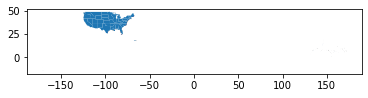

In [15]:
df = df[(df['NAME'] != 'Alaska') & (df['NAME'] != 'Hawaii')]
df.plot()
